# Red neuronal

In [81]:
import pandas as pd
df =pd.read_csv("/content/bank-full.csv", sep=";", quotechar='"')
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [82]:
y = df["y"]
del df["y"]

In [83]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [84]:
df_dummies = pd.get_dummies(
    data=df,
    columns=[
        "job",
        "marital",
        "education",
        "default",
        "housing",
        "loan",
        "contact",
        "month",
        "poutcome"
    ]
)

In [85]:
#ahora antes de crear una red neutral hacemos primero: ESCALAR el dataset

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_dummies)
df_x_escalado =scaler.transform(df_dummies)

#el escalador es min-x, x-min, x-18 /77....

⭐  **MinMaxScaler**  -->  transforma todas las columnas numéricas para que sus valores estén entre 0 y 1.

⸻

* scaler = MinMaxScaler() --- creas el “escalador”, la herramienta que normaliza datos.
* scaler.fit(df_dummies) -----El escalador aprende el valor mínimo y máximo de cada columna.
* caler.transform(df_dummies) -----Usa esos mínimos y máximos para convertir todos los valores al rango 0–1.

⸻

⭐ **¿Por qué hay que escalar?** cuando algunas columnas tienen valores muy grandes y otras muy pequeños.
ej: ingresos puede ir de 0 a 100 000. edad va de 0 a 100

Sin escalar, los valores grandes dominan al modelo y lo engañan.
El modelo piensa que una variable es “más importante” solo porque sus números son grandes.

Escalar sirve para que:
* todas las variables tengan el mismo peso
* ninguna domine a las demás
* los algoritmos funcionen mejor y más rápido
* los resultados sean más estables

In [111]:
df.age.max()

95

In [87]:
df.age.min()

18

In [88]:
95-18

77

In [89]:
df_x_escalado

array([[0.51948052, 0.09225936, 0.13333333, ..., 0.        , 0.        ,
        1.        ],
       [0.33766234, 0.07306666, 0.13333333, ..., 0.        , 0.        ,
        1.        ],
       [0.19480519, 0.07282153, 0.13333333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.7012987 , 0.12468905, 0.53333333, ..., 0.        , 1.        ,
        0.        ],
       [0.50649351, 0.07886805, 0.53333333, ..., 0.        , 0.        ,
        1.        ],
       [0.24675325, 0.09977666, 0.53333333, ..., 1.        , 0.        ,
        0.        ]])

In [90]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df_dummies, y)

In [91]:
train_X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
14413,43,-441,14,216,3,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11590,52,-309,19,500,2,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
12295,34,1,25,247,1,-1,0,True,False,False,...,True,False,False,False,False,False,False,False,False,True
29287,33,123,2,175,2,-1,0,False,True,False,...,False,False,False,False,False,False,False,False,False,True
9292,40,12,5,54,26,-1,0,False,True,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23956,36,268,29,54,12,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8934,39,1577,4,282,15,-1,0,True,False,False,...,True,False,False,False,False,False,False,False,False,True
17969,44,488,30,292,11,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
37129,49,39,13,27,5,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,False,True


In [92]:
df_y_n = y.replace("yes", 1).replace("no", 0).astype("int")


bank_y_n = y.replace("yes", 1).replace("no", 0)

/tmp/ipython-input-218058753.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_y_n = y.replace("yes", 1).replace("no", 0)


In [93]:
df_y_n

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df_x_escalado, df_y_n)

### ahora. vamos a hacer la red neuronal:

In [ ]:
pip3 install tensorflow

In [105]:
import keras #para construir redes neuronales de forma sencilla.

from keras.models import Sequential #Sequential es un tipo de modelo donde las capas se ponen una detrás de otra, en orden

from keras.layers import Dense, Activation #Dense: capa totalmente conectada (cada neurona se conecta con todas las de la capa anterior).
#Activation: función q “deforma” la salida

from keras.callbacks import EarlyStopping # EarlyStopping sirve para detener el entrenamiento cuando la red deja de mejorar

# Crear el modelo secuencial
model = Sequential() #Creamos el modelo vacío, tipo secuencial

# 1era Capa de entrada + capa oculta 1 ---- capa con 100 neuronas y la red espera 51 variables de entrada y cada neurona aplica la funcion TANH (da valores -1 y 1)
# LO DE INPUT DIM solo se pone en primera capa pq Keras lo conecta todo
model.add(Dense(100, input_dim=51, activation="tanh"))


# Capa oculta 2
model.add(Dense(100, activation="tanh"))


# Capa de salida (2 clases) --- hay 2 neuronas de salida pq tenemos 2 clases (ej. retraso y no retraso), SOFTMAX convierte esas salidas en probabilidades q suman 1
model.add(Dense(2, activation="softmax"))



# ENTRENAMOS el modelo - y eligo q quiero accurancy
model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

#	loss="sparse_categorical_crossentropy" = función de pérdida para clasificación multiclase cuando y son enteros (0,1) y NO one-hot. Penaliza al modelo cuando predice probabilidades lejos de la clase verdadera.

#metrics=["accuracy"] durante el entrenamiento  muestre la accuracy (% de aciertos)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [106]:
model.summary()

#Este cuadro  dice cuántas neuronas tiene cada capa, q tamaño producen y cuántos pesos aprende tu modelo.
#Esta red tiene:
#15.502 parámetros (pesos y biases).
# Trainable params: 15,502 - Todo se entrena (no congeladas capas).
#Non-trainable params: 0 --No hay capas fijas.

#Param se calcula(input_features * neuronas) + biases. ej. dense_15 = (51 * 100) + 100 = 5200
#dense_16= (100 * 100) + 100 = 10.100

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 100)            │         5,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,502 (60.55 KB)

 Trainable params: 15,502 (60.55 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
#ENTRENAR MODELO

history = model.fit(train_X, train_y, validation_data=(test_X, test_y),epochs=100) #epochs es q me lo va a pasar por 100 epocas...
#Más épocas → el modelo aprende más
#Pero demasiadas épocas → OVERFITTING (como ocurre en este caso -ver las sg gráficas

Epoch 1/100
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8935 - loss: 0.2888 - val_accuracy: 0.8954 - val_loss: 0.2730
Epoch 2/100
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8986 - loss: 0.2520 - val_accuracy: 0.9001 - val_loss: 0.2471
Epoch 3/100
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8994 - loss: 0.2455 - val_accuracy: 0.9013 - val_loss: 0.2351
Epoch 4/100
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9014 - loss: 0.2331 - val_accuracy: 0.9024 - val_loss: 0.2261
Epoch 5/100
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8999 - loss: 0.2301 - val_accuracy: 0.9057 - val_loss: 0.2238
Epoch 6/100
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9046 - loss: 0.2216 - val_accuracy: 0.9027 - val_loss: 0.2178
Epoch 7/100
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9053 - loss: 0.2196 - val_accuracy: 0.9049 - val_loss: 0.2162
Epoch 8/100
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9054 - loss: 0

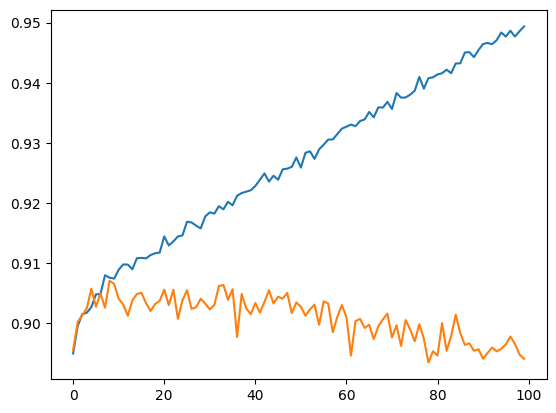

In [99]:
from matplotlib import pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])


El modelo sigue memorizando el entrenamiento, pero su precisión en validación se estanca y empeora: señal clara de sobreajuste.

*	Accuracy de entrenamiento (línea azul)
*	Accuracy de validación (línea naranja)

a lo largo de muchas épocas.

⸻


✔ La accuracy de entrenamiento (azul) sube de forma constante

Empieza alrededor de 0.90 y llega a más de 0.95.
➡️ El modelo aprende cada vez mejor… pero solo en los datos de entrenamiento.

⸻

✔ La accuracy de validación (naranja) no mejora y se mantiene baja

Se queda alrededor de 0.90, con pequeñas subidas y bajones.
Incluso va bajando ligeramente hacia el final.

➡️ El modelo NO mejora su rendimiento en datos nuevos.
➡️ Es totalmente estable pero no progresa.

⸻

⭐ Conclusión clara

Este es un caso típico de: 🚨 OVERFITTING fuerte

*	El modelo está aprendiendo demasiado los datos de entrenamiento
*	Pero no generaliza
*	La brecha entre azul (sube) y naranja (plana o baja) se hace cada vez mayor


In [109]:
es_callback = EarlyStopping(monitor="val_loss", patience=10)

history = model.fit(train_X, train_y, validation_data=(test_X, test_y),epochs=100, callbacks=[es_callback])

Epoch 1/100
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8863 - loss: 0.3028 - val_accuracy: 0.9003 - val_loss: 0.2542
Epoch 2/100
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9008 - loss: 0.2494 - val_accuracy: 0.9027 - val_loss: 0.2391
Epoch 3/100
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9013 - loss: 0.2436 - val_accuracy: 0.9022 - val_loss: 0.2394
Epoch 4/100
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9024 - loss: 0.2269 - val_accuracy: 0.9034 - val_loss: 0.2293
Epoch 5/100
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9023 - loss: 0.2235 - val_accuracy: 0.9023 - val_loss: 0.2200
Epoch 6/100
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9079 - loss: 0.2164 - val_accuracy: 0.9024 - val_loss: 0.2207
Epoch 7/100
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9058 - loss: 0.2165 - val_accuracy: 0.9029 - val_loss: 0.2185
Epoch 8/100
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9063 - loss: 0

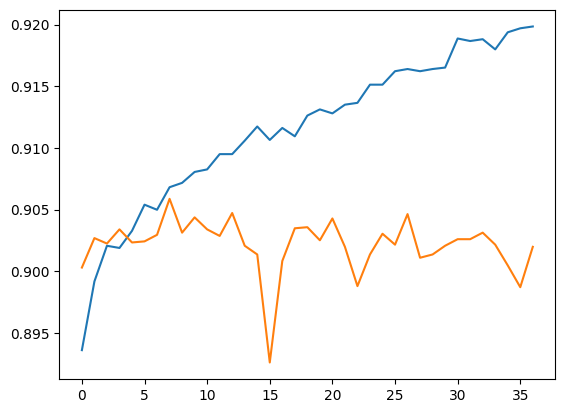

In [110]:
from matplotlib import pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])


El gráfico muestra la evolución de la accuracy durante el entrenamiento de una red neuronal:
* Línea azul → accuracy del entrenamiento
* Línea naranja → accuracy de validación

⸻
✔ 1. La accuracy de entrenamiento (azul) sube de forma estable 👉 El modelo aprende cada vez mejor en los datos de entrenamiento.

✔ 2. La accuracy de validación (naranja) se mantiene más baja y es inestable. Oscila alrededor de 0.900 y tiene bajones fuertes.
👉 El modelo no mejora en los datos nuevos.
👉 Aparecen fluctuaciones y caídas.

⸻

El modelo:
*	aprende muy bien el entrenamiento, pero
*	no mejora en validación, e incluso empeora en algunos momentos

👉 Esto indica sobreajuste (overfitting):
el modelo se está ajustando demasiado a los datos de entrenamiento y no generaliza igual de bien a datos nuevos.
